In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Kmean_dataset.csv")
df.head()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
df.shape

(178, 13)

In [4]:
X_train=np.array(df)

In [5]:
X_train

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [6]:
print(X_train.shape)

(178, 13)


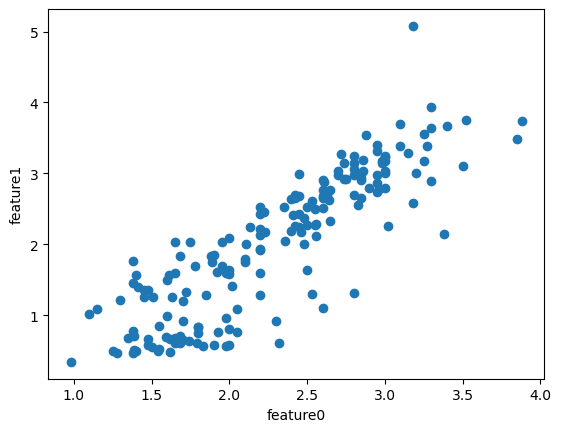

In [7]:
plt.scatter(X_train[:,5],X_train[:,6])
plt.xlabel("feature0")
plt.ylabel("feature1")
plt.show()

In [8]:
def normalise(X):
    mean=np.mean(X,axis=0)
    dev=np.std(X,axis=0)
    return (X-mean)/dev

In [9]:
X_train_n=normalise(X_train)

In [10]:
def centroid_init(K,X):
    c_idx=np.random.permutation(X)
    centroids=c_idx[0:K,:]
    return centroids

In [11]:
def find_closest_centroids(X, centroids):
    d=[]
    K = centroids.shape[0]
    idx=np.zeros(X.shape[0])
    m=X.shape[0]
    for i in range (m):
        dist=(np.sum((X[i]-centroids)**2,axis=1))
        idx[i]=np.argmin(dist)
        d.append(np.min(dist))
    return idx,d

In [12]:
def compute_centroids(X, idx, K):
    m, n = X.shape
    centroids = np.zeros((K, n))
    for i in range (K):
        points=X[np.argwhere(idx==i)]
        centroids[i]=np.mean(points,axis=0)
    return centroids

In [13]:
def run_kMeans(X, initial_centroids, max_iters,K):
    J_hist=[]
    m, n = X.shape
    centroids = initial_centroids
    idx = np.zeros(m)
    for i in range(max_iters):
        idx,d = find_closest_centroids(X, centroids)
        centroids = compute_centroids(X, idx, K)
    J_hist.append(cost(d))
    return centroids, idx ,J_hist

In [14]:
def cost(d):
    cost=np.sum(d)
    return cost

Text(0, 0.5, 'cost')

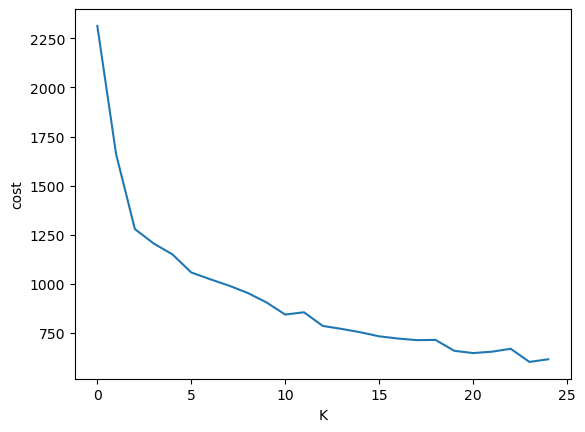

In [19]:
c=[]
for k in range(1,26):
    centr_init=centroid_init(k,X_train_n,)
    centr,idx,J_hist=run_kMeans(X_train_n,centr_init,100,k)
    c.append(J_hist[-1])
plt.plot(c)
plt.xlabel("K")
plt.ylabel("cost")

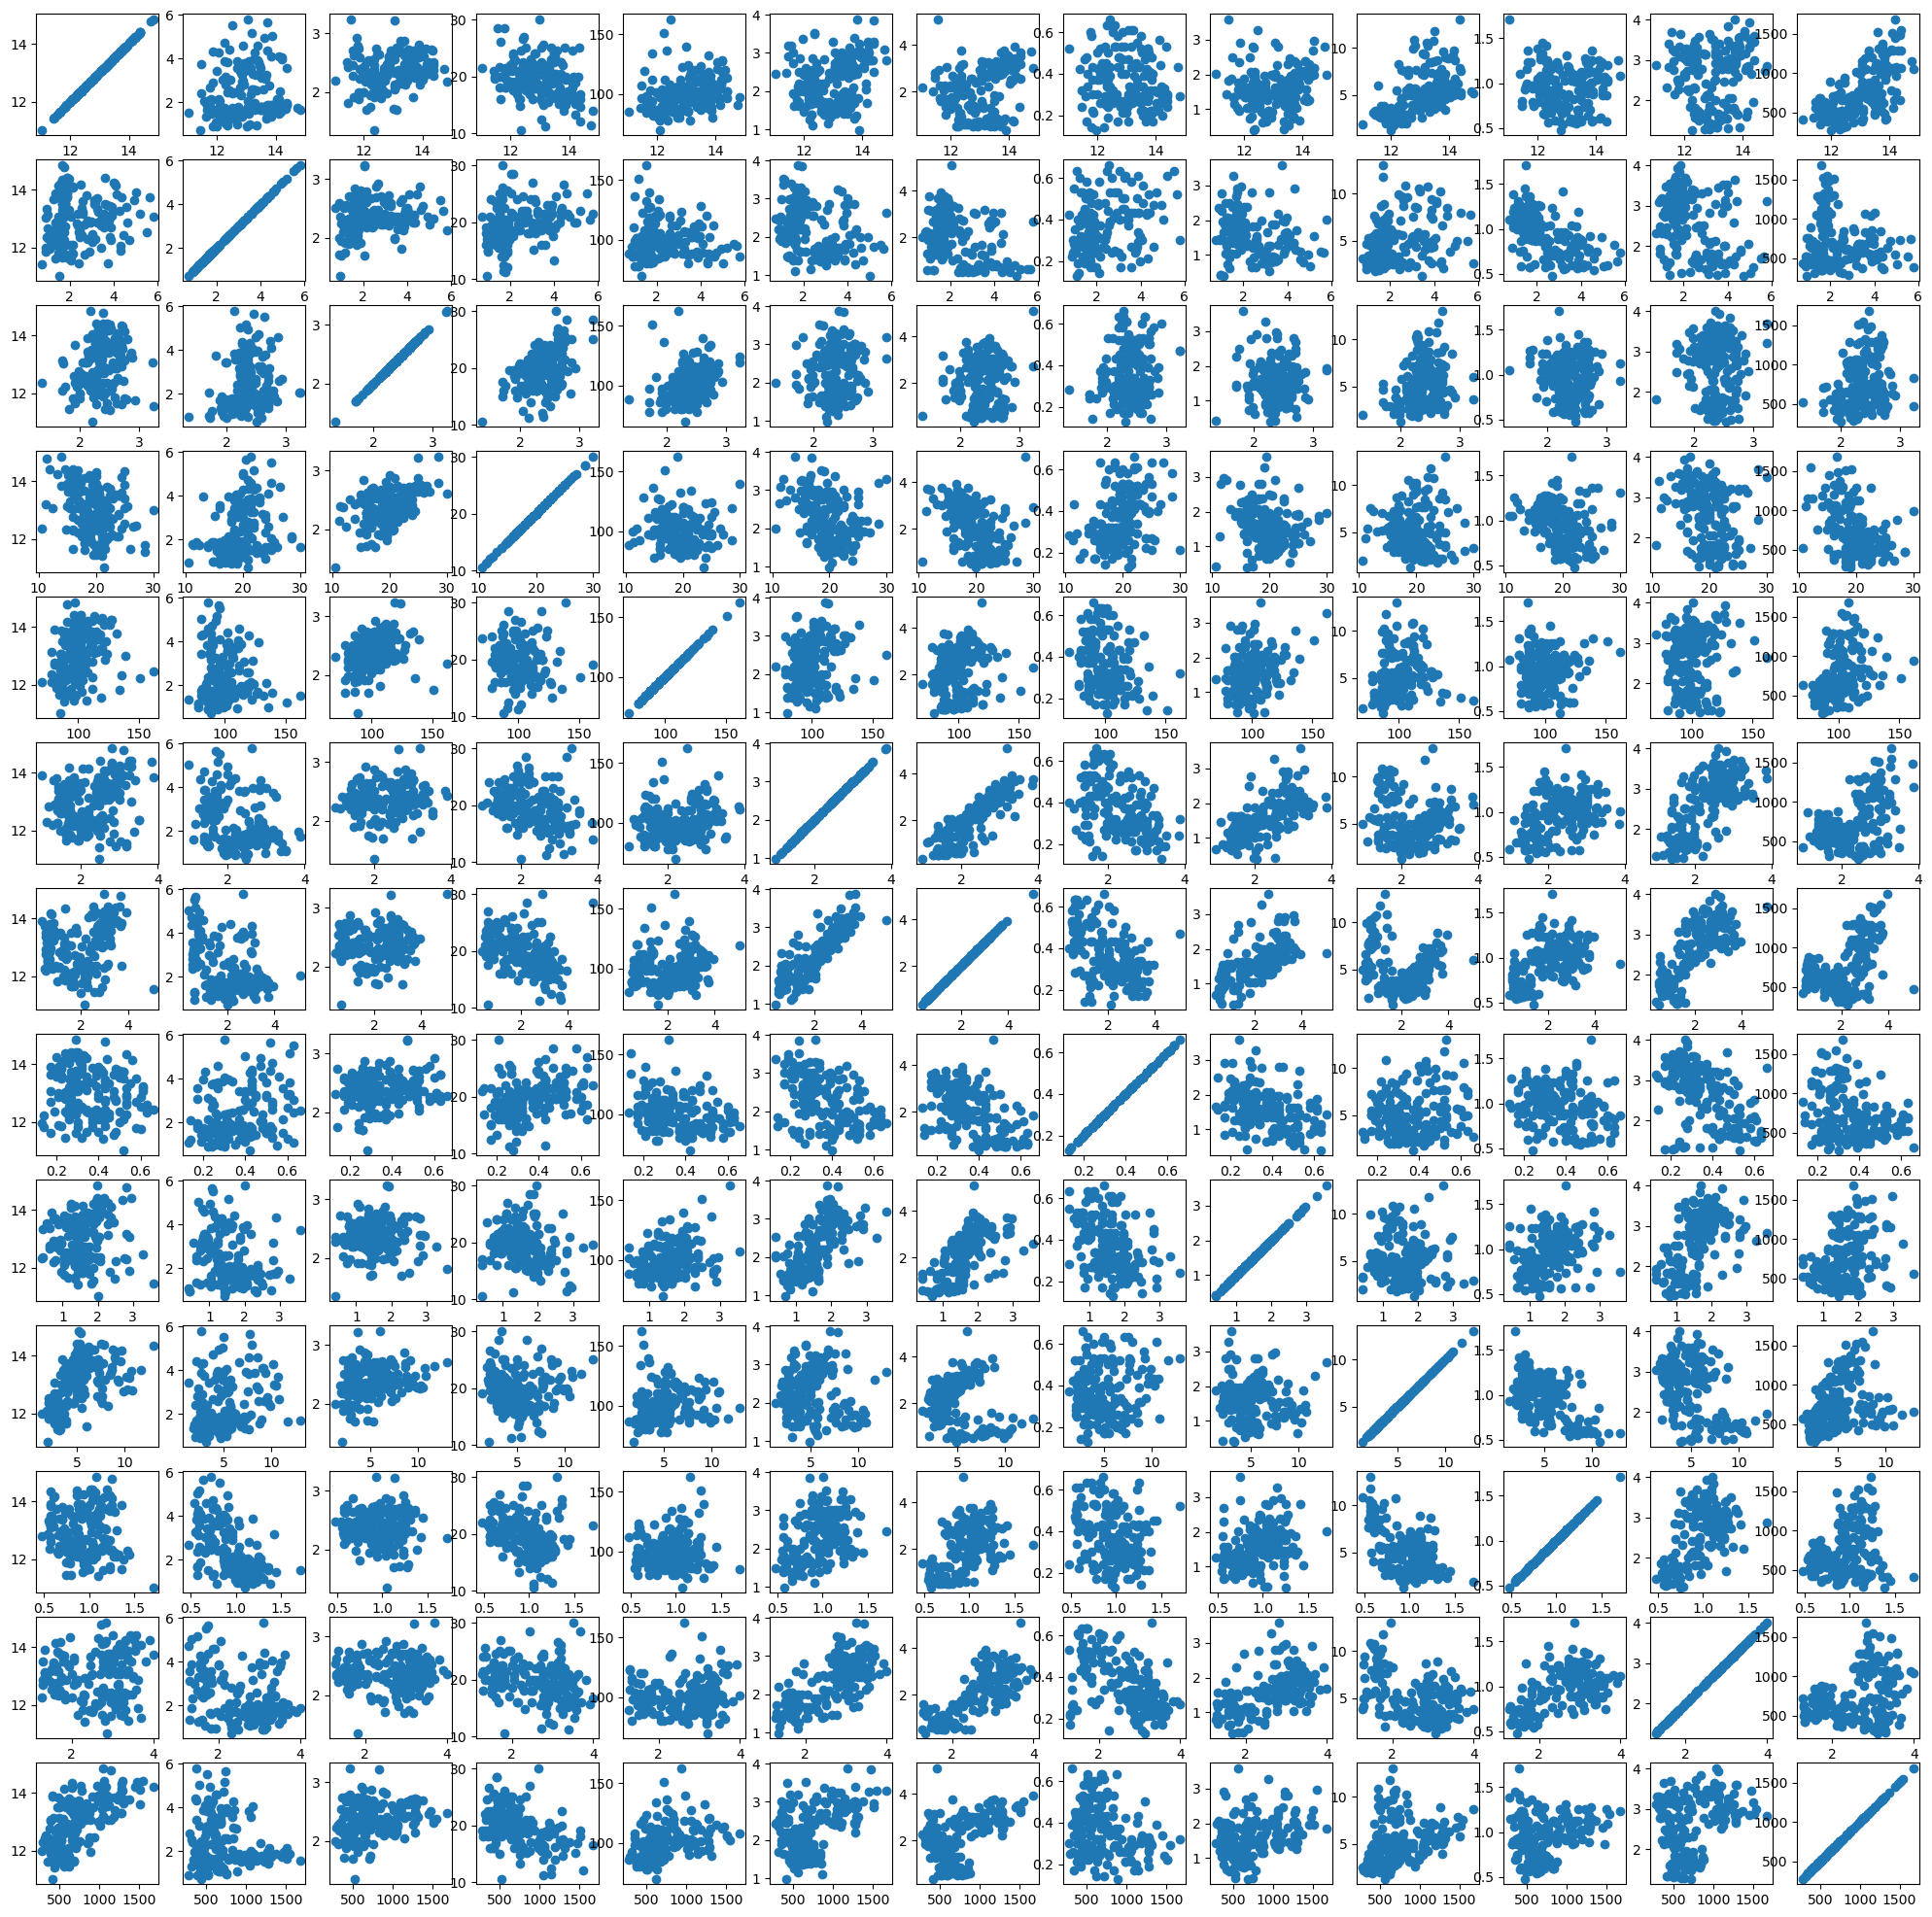

In [20]:
fig,axis=plt.subplots(nrows=13,ncols=13,figsize=(25,25))
for i in range(13):
    for j in range(13):
        axis[i,j].scatter(X_train[:,i],X_train[:,j])